# Выполнил: Баталов Кирилл Дмитриевич РИ-320941


# Задача -  Предсказание популярности треков в Spotify. 


## Импорт необходимых библиотек

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
import warnings

### Загрузка датасета

In [130]:
df = pd.read_csv('dataset.csv')
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


## 📊 Исследовательский анализ данных (EDA)

In [131]:
# Проверка информации о датасете
print("\nИнформация о датасете:")
df.info()


Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 

In [132]:
# Статистическая сводка
print("\nСтатистическая сводка:")
df.describe()


Статистическая сводка:


,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [134]:
print("\nПропущенные значения:")
print(df.isnull().sum())


Пропущенные значения:
Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [135]:
# Количество строк до очистки
print("Количество строк до очистки:", len(df))

# Удаляем строки с пропущенными значениями
df = df.dropna()

# Количество строк после очистки
print("Количество строк после очистки:", len(df))

# Проверяем, что пропущенных значений больше нет
print("\nПропущенные значения после очистки:")
print(df.isnull().sum())

Количество строк до очистки: 114000
Количество строк после очистки: 113999

Пропущенные значения после очистки:
Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [136]:
# Дубликаты
duplicate_rows = df.duplicated().sum()
duplicate_rows

np.int64(0)

### Изображение данных

In [137]:
# Настраиваем стиль графиков
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

In [138]:
# 1. ГИСТОГРАММЫ для числовых признаков
# Выбираем числовые признаки
numeric_features = ['popularity','duration_ms','danceability','energy','key','loudness',
                    'mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo']


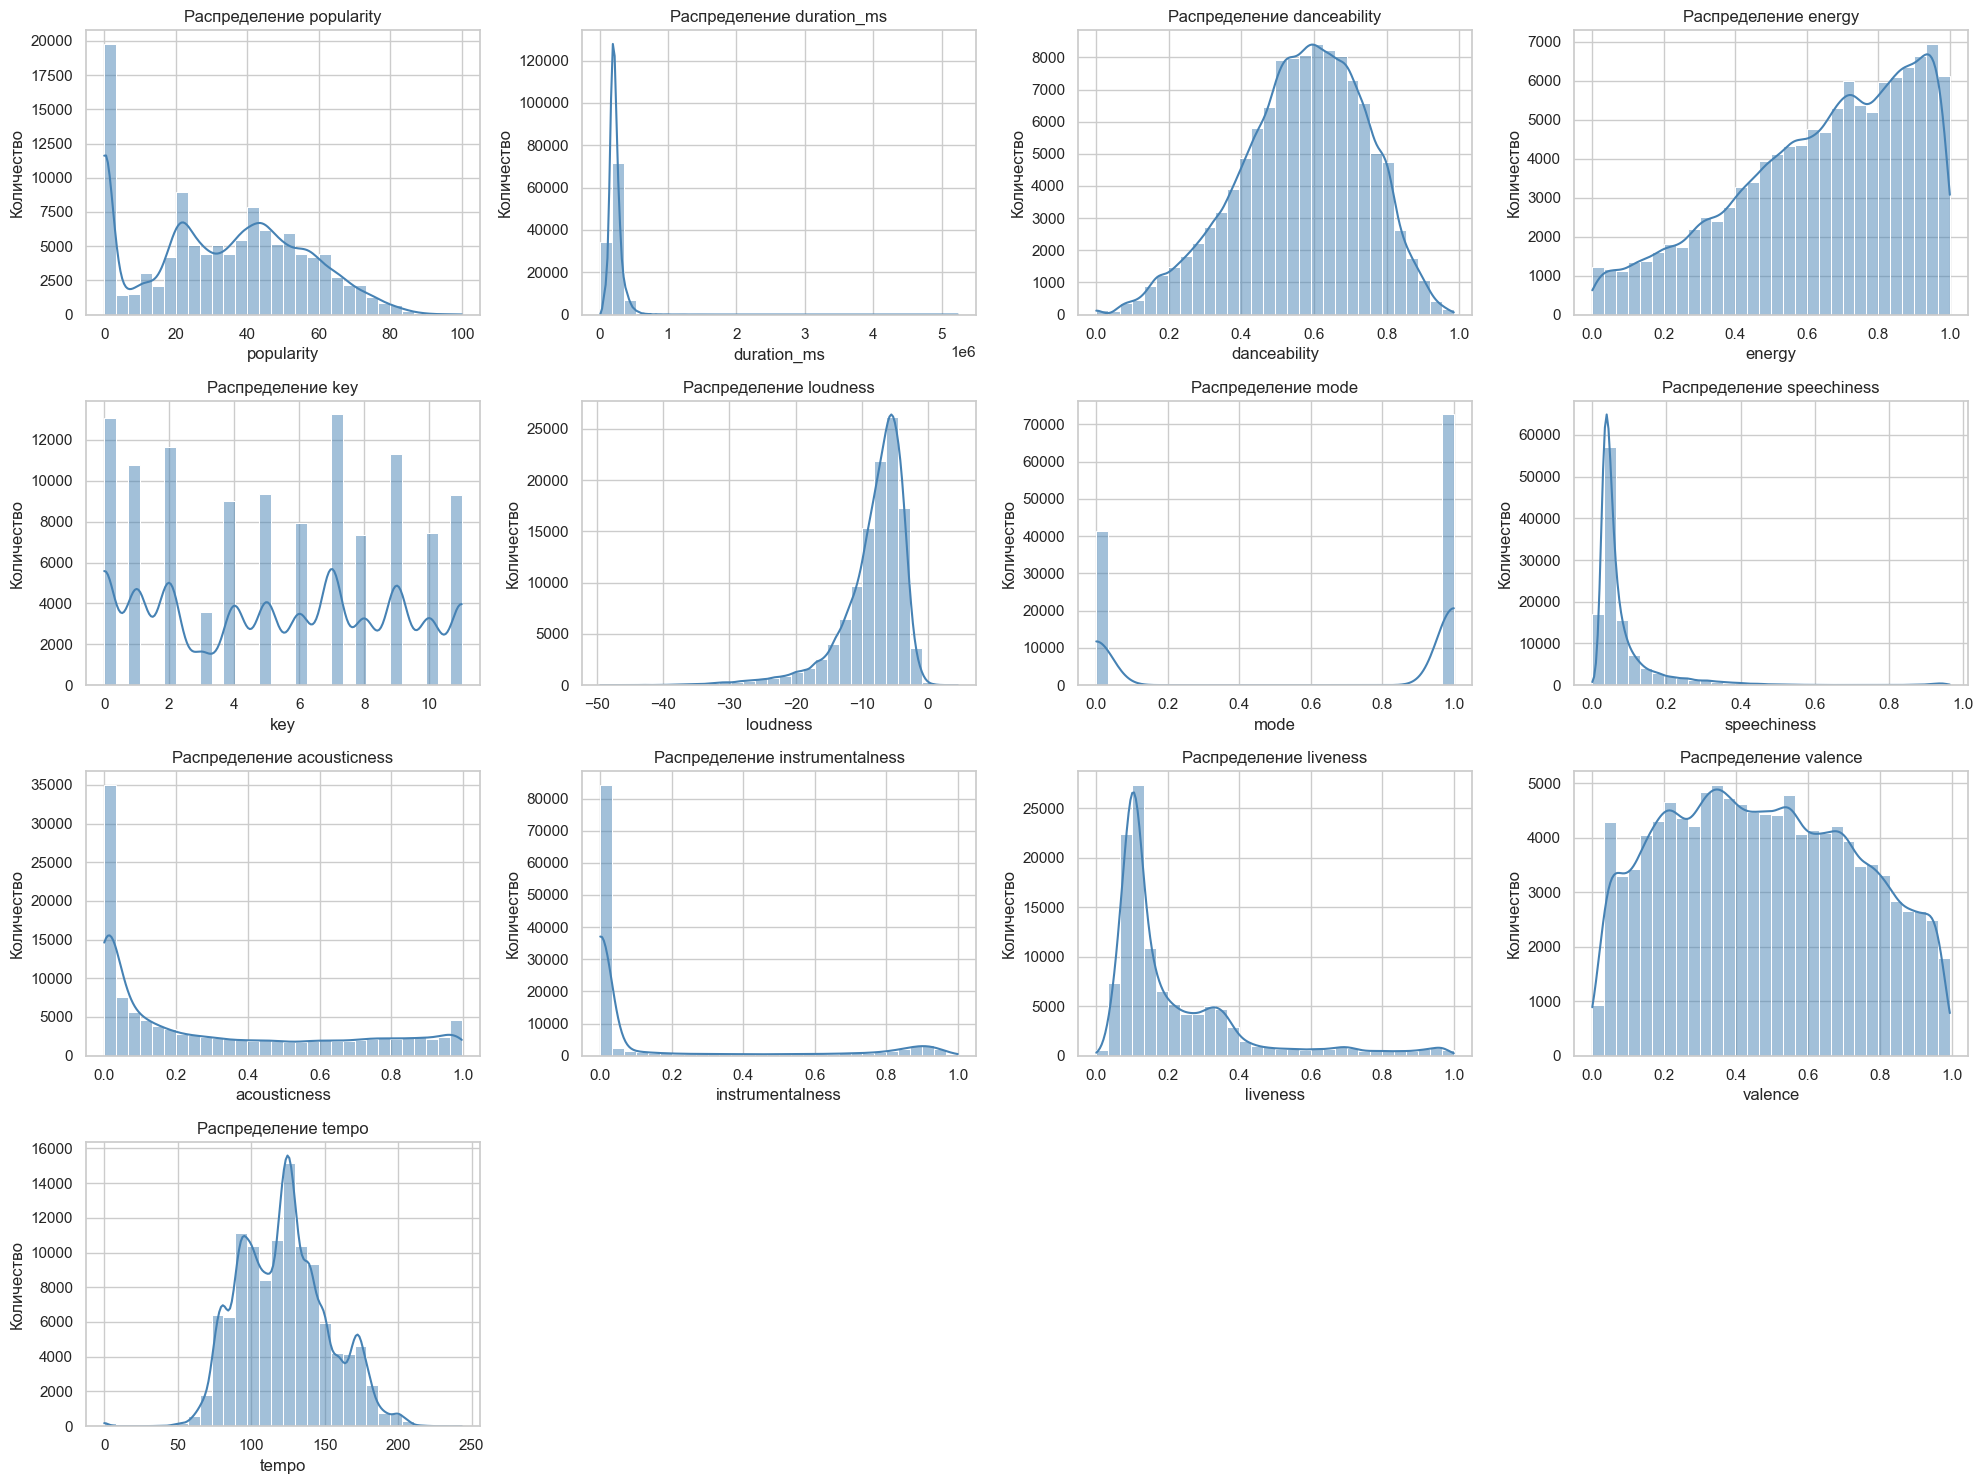

In [139]:
# Отрисовываем гистограммы
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numeric_features):
    plt.subplot(4, 4, i+1)
    sns.histplot(data=df, x=feature, bins=30, kde=True, color='steelblue')
    plt.title(f'Распределение {feature}')
    plt.xlabel(feature)
    plt.ylabel('Количество')
plt.tight_layout()
plt.show()

#### Выводы по представленным диаграммам:

#### Popularity (Популярность):

Большинство треков имеют низкую популярность (0-20)

Есть несколько пиков в районе 20-40

Очень мало треков с популярностью выше 80

#### Duration_ms (Длительность):

Большинство треков имеют стандартную длительность около 3-4 минут

Есть очень длинные треки 

Очень мало треков длиннее 5-6 минут

#### Danceability (Танцевальность):

Пик около 0.6-0.7

Большинство треков имеют среднюю танцевальность

Очень мало треков с экстремально низкой (<0.2) или высокой (>0.9) танцевальностью

#### Energy (Энергичность):

Большинство треков имеют высокую энергичность (>0.6)

Заметный рост количества треков с увеличением энергичности

#### Key (Тональность):

Дискретное распределение (0-11)

Относительно равномерное распределение между всеми тональностями

Небольшое преобладание определенных тональностей (0, 7)

Тоже перенесем в категориальные признаки

#### Loudness (Громкость):

Пик около -7 дБ

Очень мало треков с громкостью выше 0 дБ или ниже -20 дБ

#### Mode (Лад):

Бинарное распределение (0 или 1) - поэтому убираем в категориальные признаки

Преобладает лад 1

Примерно 60/40 соотношение 1/2

#### Speechiness (Речевое содержание):

Большинство треков имеют низкое значение (<0.1)

Очень мало треков с высоким содержанием речи

##### cousticness (Акустичность):

Много треков либо с очень низкой (<0.1), либо с очень высокой (>0.9) акустичностью

Меньше всего треков со средней акустичностью

#### Instrumentalness (Инструментальность):

Большинство треков имеют очень низкую инструментальность (<0.1)

Небольшой пик в районе 0.9-1.0

#### Liveness (Живое исполнение):

Большинство треков имеют низкие значения (<0.2)

Небольшой пик около 0.1

#### Valence (Валентность/настроение):

Небольшой пик в середине (0.4-0.6)

Слегка меньше треков с экстремальными значениями

#### Tempo (темп,ритм):

Большинство треков имеют средний ритм (100-150)

Мало треков с ритмом <50 и >200

### Общие выводы:
Многие характеристики имеют несимметричные распределения

Большинство треков имеют низкую популярность

Преобладают энергичные, танцевальные треки

Большинство треков не инструментальные и имеют низкое речевое содержание

Существует явное разделение между акустическими и неакустическими треками

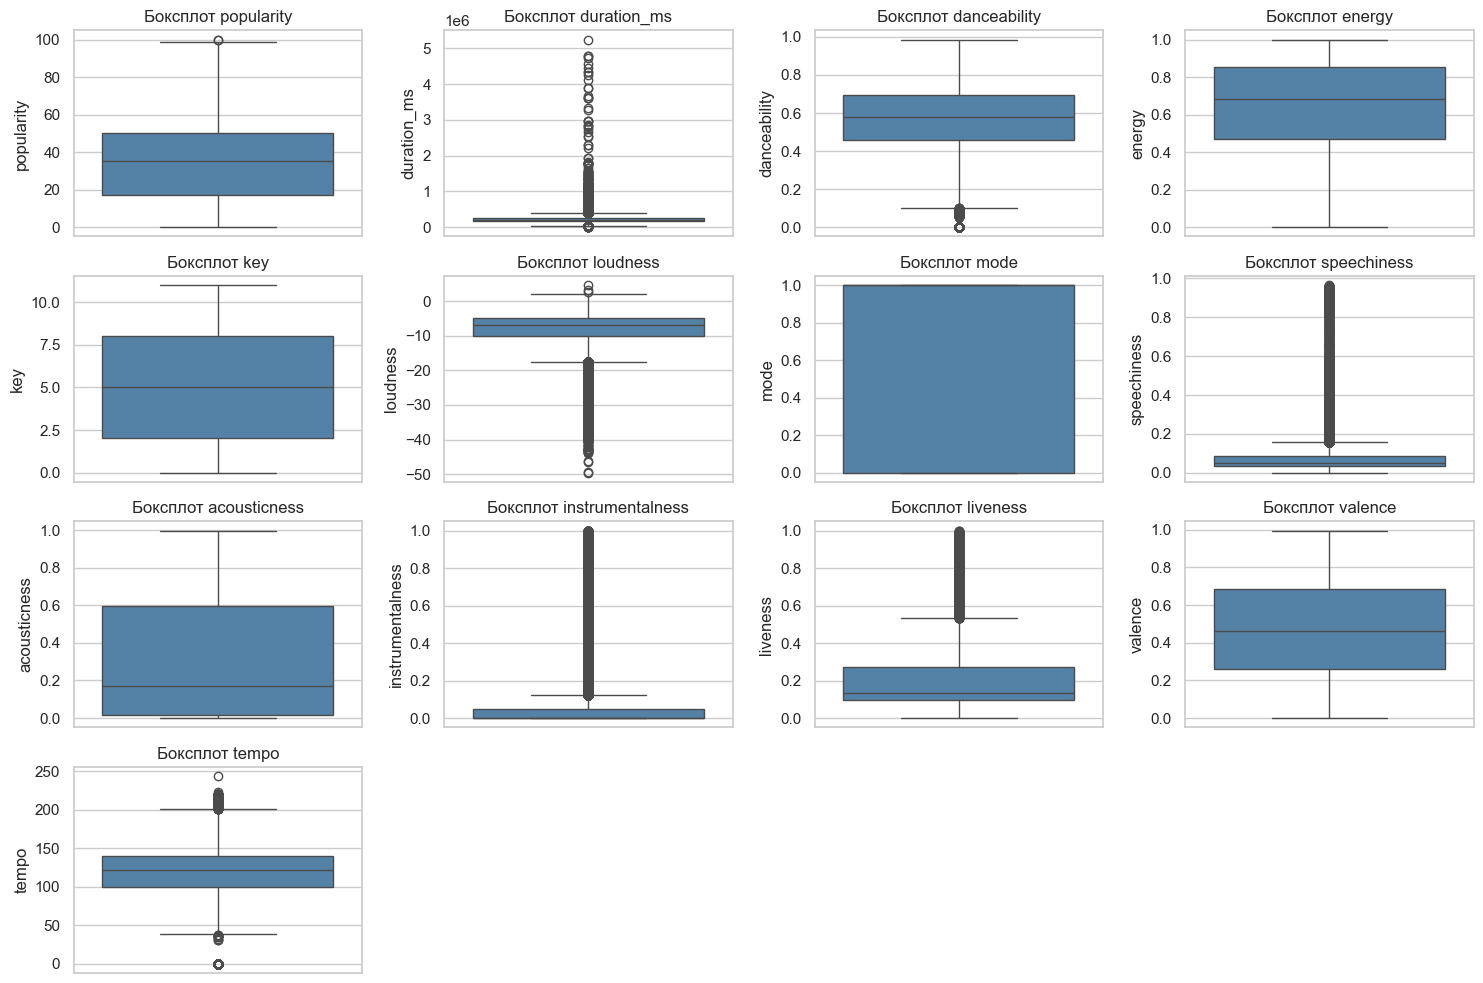

In [140]:
# 2. ЯЩИКИ С УСАМИ (БОКСПЛОТЫ)

# Подробные боксплоты для каждого признака отдельно
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=df[feature], color='steelblue')
    plt.title(f'Боксплот {feature}')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

#### Выводы по боксплотам:

#### Popularity:

Медиана около 35

Много выбросов в верхней части (популярные треки)

Межквартильный размах примерно от 20 до 50

Асимметрия распределения (верхний "ус" длиннее)

#### Duration_ms:

Огромное количество выбросов в верхней части

Основная масса треков имеет схожую длительность

Есть экстремально длинные треки 

Стоит рассмотреть логарифмическое преобразование или удаление экстремальных выбросов

#### Danceability:

Достаточно симметричное распределение

Медиана около 0.6

Мало выбросов

Компактный межквартильный размах (0.45-0.7)

#### Energy:

Медиана около 0.65

Относительно симметричное распределение

Небольшое количество выбросов в нижней части

Большой межквартильный размах (0.45-0.8)

#### Loudness:

Много выбросов в нижней части (очень тихие треки)

Медиана около -7 дБ

Асимметричное распределение

Возможно, стоит обработать выбросы

#### Speechiness:

Сильно асимметричное распределение

Большинство значений близки к 0

Много выбросов в верхней части

Возможно, стоит применить логарифмическое преобразование

#### Acousticness:

U-образное распределение (много значений близких к 0 и 1)

Медиана около 0.2

Большой разброс значений

#### Instrumentalness:

Экстремально асимметричное распределение

Большинство значений близки к 0

Выбросы распределены по всему диапазону

#### Liveness:

Сильно асимметричное распределение

Медиана около 0.15

Много выбросов в верхней части

Стоит рассмотреть логарифмическое преобразование

#### Valence:

Относительно равномерное распределение

Медиана около 0.45

Умеренное количество выбросов

#### Tempo:

Медиана около 125

Имееются выбросы в верхней и нижней части

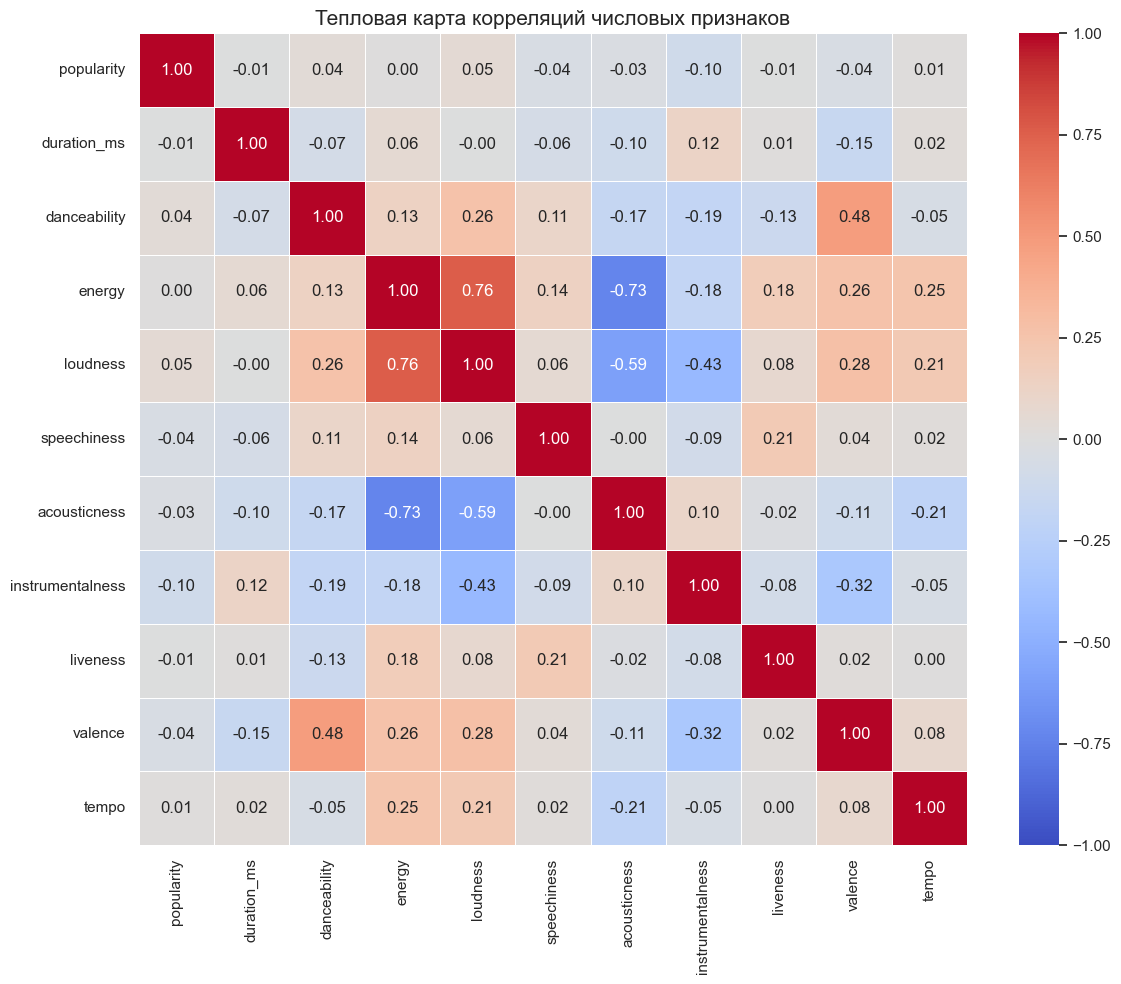

In [141]:
# 3. ТЕПЛОВАЯ КАРТА КОРРЕЛЯЦИЙ между всеми числовыми признаками
# Создаем числовую матрицу для корреляций
df_corr = df.copy()

# Выбираем числовые признаки для корреляционной матрицы
# Уберем mode и key из числовых признаков
numeric_corr_features = ['popularity','duration_ms','danceability','energy','loudness',
                    'speechiness','acousticness','instrumentalness','liveness','valence', 'tempo']

# Вычисляем корреляции и отрисовываем тепловую карту
plt.figure(figsize=(12, 10))
corr_matrix = df_corr[numeric_corr_features].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            linewidths=0.5, vmin=-1, vmax=1)
plt.title('Тепловая карта корреляций числовых признаков', fontsize=15)
plt.tight_layout()
plt.show()

#### Проанализируем тепловую карту корреляций:

#### Сильные корреляции (> 0.5):

energy и loudness (0.76) - самая сильная положительная корреляция; чем энергичнее трек, тем он громче

energy и acousticness (-0.73) - сильная отрицательная корреляция, чем более акустический трек, тем меньше в нем энергии;
электронные треки обычно более энергичные

loudness и acousticness (-0.59) - заметная отрицательная корреляция, акустические треки обычно тише
,подтверждает связь с energy

#### Средние корреляции (0.3-0.5):

danceability и valence (0.48) - 
танцевальные треки часто более позитивные, умеренная положительная связь

instrumentalness и loudness (-0.43) - 
инструментальные треки немного тише, умеренная отрицательная связь

instrumentalness и valence (-0.32) - 
инструментальные треки немного менее "позитивные"

#### Важные наблюдения:
Popularity (целевая переменная):
очень слабые корреляции со всеми числовыми признаками (< 0.1)


C:\Users\kirya\AppData\Local\Temp\ipykernel_5748\114970616.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')
C:\Users\kirya\AppData\Local\Temp\ipykernel_5748\114970616.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')
C:\Users\kirya\AppData\Local\Temp\ipykernel_5748\114970616.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')
C:\Users\kirya\AppData\Local\Temp\ipykernel_5748\114970616

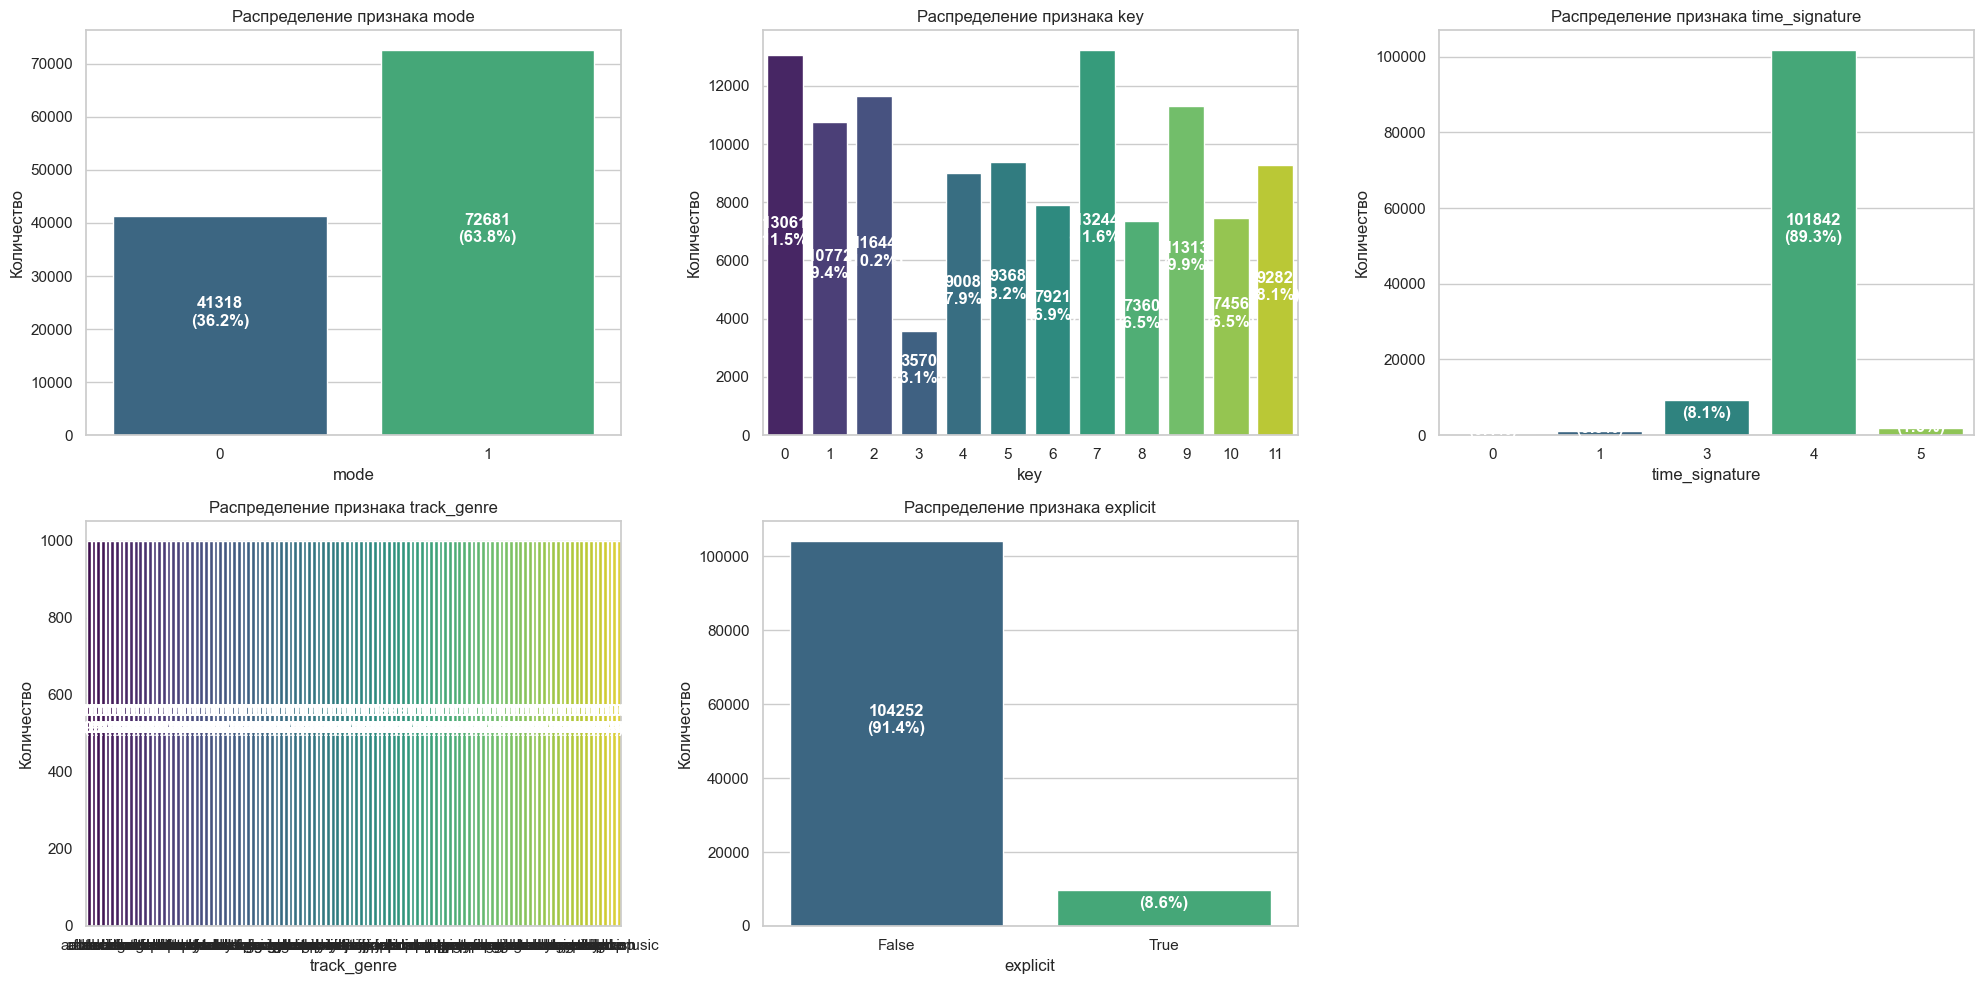

In [142]:
# 4. ГРАФИКИ РАСПРЕДЕЛЕНИЯ категориальных признаков
categorical_features = ['mode', 'key', 'time_signature', 'track_genre', 'explicit']

plt.figure(figsize=(20, 10))
for i, feature in enumerate(categorical_features):
    if feature in df.columns:
        plt.subplot(2, 3, i+1)  
        counts = df[feature].value_counts().sort_index()
        sns.barplot(x=counts.index, y=counts.values, palette='viridis')
        plt.title(f'Распределение признака {feature}')
        plt.xlabel(feature)
        plt.ylabel('Количество')
        
        # Добавляем метки с количеством и процентами
        total = len(df)
        for j, v in enumerate(counts.values):
            percentage = v / total * 100
            plt.text(j, v/2, f'{v}\n({percentage:.1f}%)', 
                    horizontalalignment='center',
                    color='white', fontweight='bold')

plt.tight_layout()  
plt.show()

#### Выводы по графикам:

#### Mode (Лад):

Мажорный лад (1) преобладает - 63.8% треков

Минорный лад (0) - 36.2% треков

Явное преобладание мажорных композиций

Подтверждает необходимость перевода в категориальный признак

#### Key (Тональность):

Распределение относительно равномерное

Подтверждает необходимость перевода в категориальный признак

#### Time_signature (Размер такта):

Сильное доминирование размера 4/4 (значение 4) - 89.3%

Размер 3/4 (значение 3) встречается редко - около 8.1%

Остальные размеры (1, 5) встречаются крайне редко


#### Track_genre (Жанр трека):

Большое количество уникальных жанров

Распределение выглядит достаточно равномерным

Потребуется тщательная обработка из-за большого количества категорий

#### Explicit (Ненормативная лексика):

Сильный дисбаланс классов:

False (нет ненормативной лексики) - 91.4%

True (есть ненормативная лексика) - 8.6%

### Среднее значение popularity для каждой категории

mode
0    33.651459
1    33.004251
Name: popularity, dtype: float64


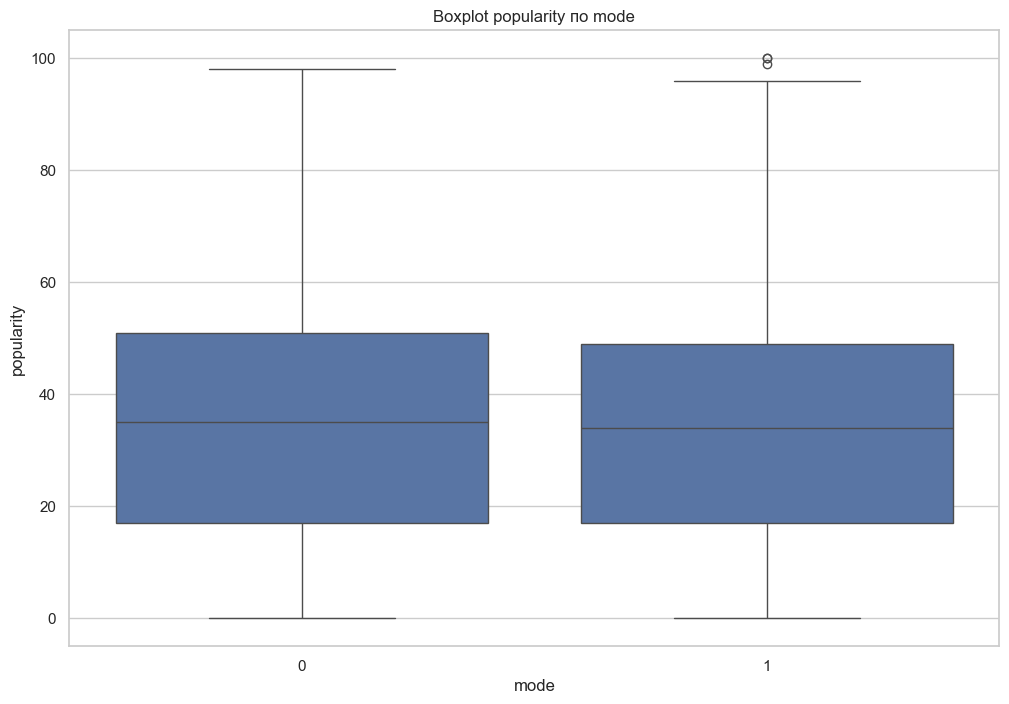

explicit
False    32.938207
True     36.454191
Name: popularity, dtype: float64


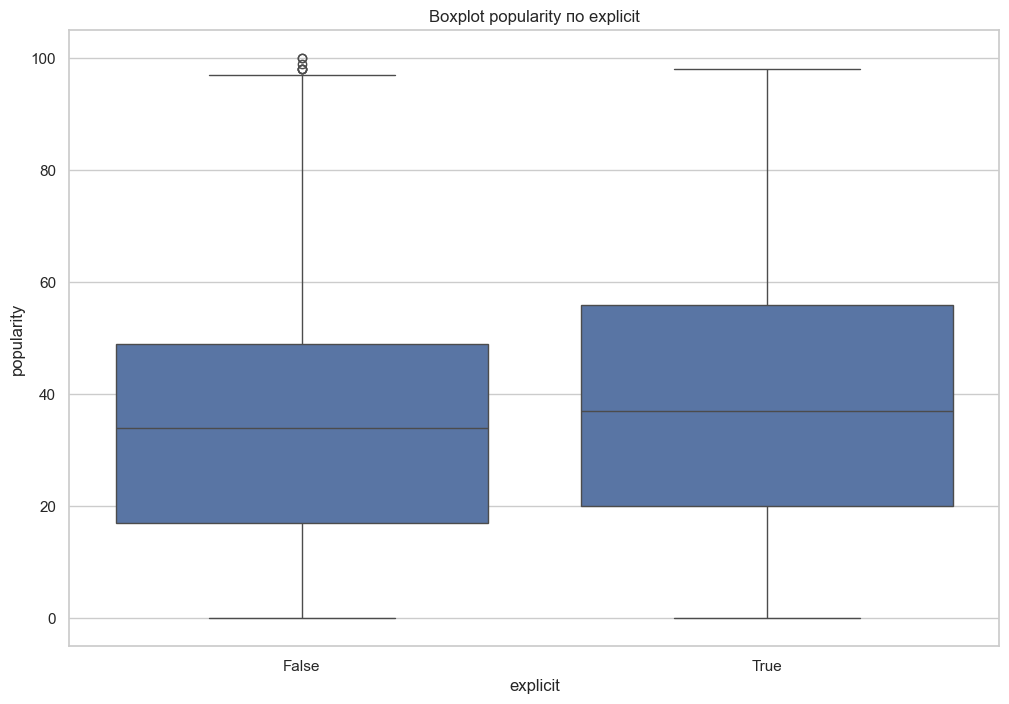

In [143]:
for col in ['mode', 'explicit']:
    print(df.groupby(col)['popularity'].mean())
    sns.boxplot(x=col, y='popularity', data=df)
    plt.title(f'Boxplot popularity по {col}')
    plt.show()

key
0     32.519945
1     33.200241
2     34.377619
3     33.031653
4     34.643650
5     32.930935
6     33.585532
7     32.582075
8     32.958696
9     32.823566
10    32.461373
11    33.887632
Name: popularity, dtype: float64


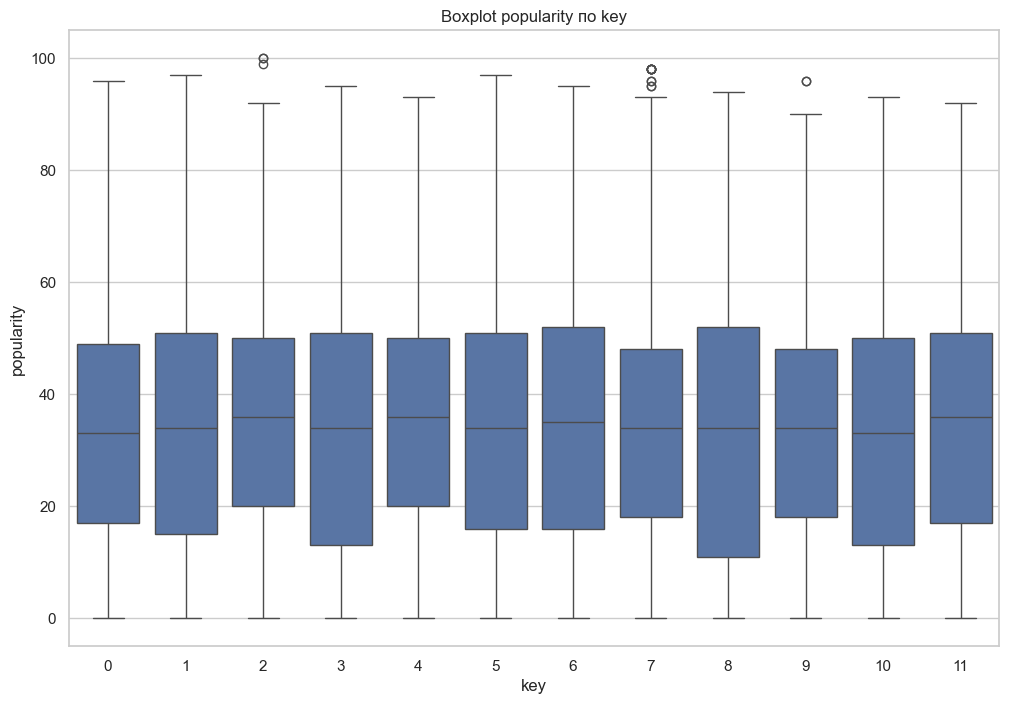

time_signature
0    36.975460
1    29.073998
3    29.692442
4    33.672807
5    28.778204
Name: popularity, dtype: float64


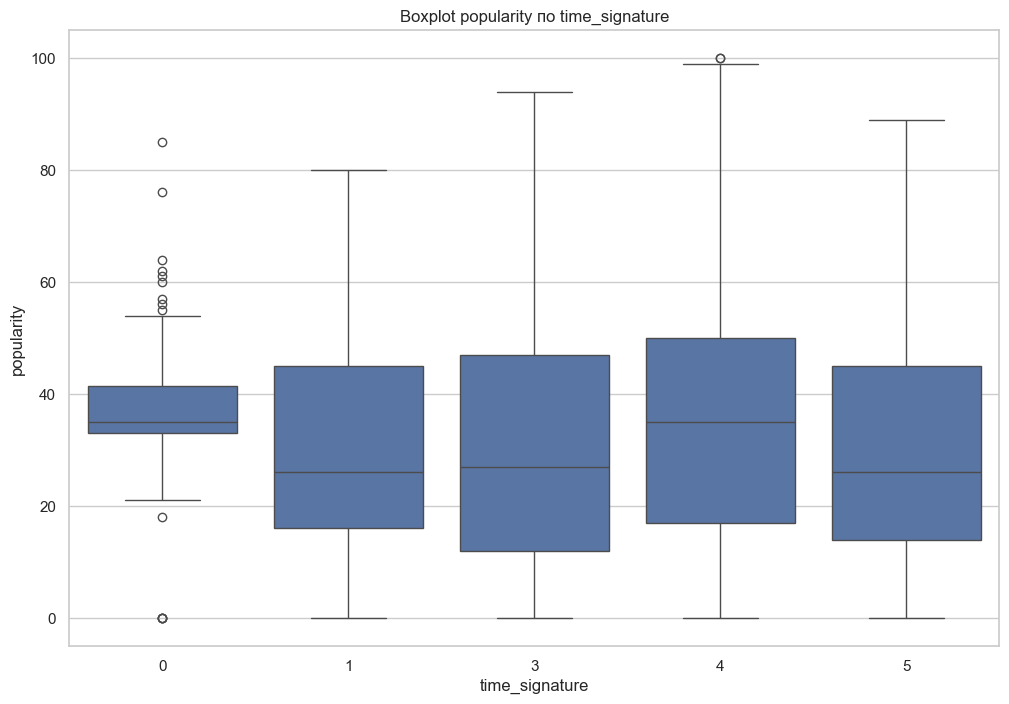

In [144]:
for col in ['key', 'time_signature']:
    print(df.groupby(col)['popularity'].mean())
    sns.boxplot(x=col, y='popularity', data=df)
    plt.title(f'Boxplot popularity по {col}')
    plt.show()

track_genre
pop-film             59283
k-pop                56896
chill                53651
sad                  52379
grunge               49594
indian               49539
anime                48772
emo                  48128
sertanejo            47866
pop                  47576
progressive-house    46615
piano                45273
mandopop             45025
deep-house           44808
brazil               44670
electronic           44325
pagode               44298
ambient              44191
british              43802
metal                43705
Name: popularity, dtype: int64


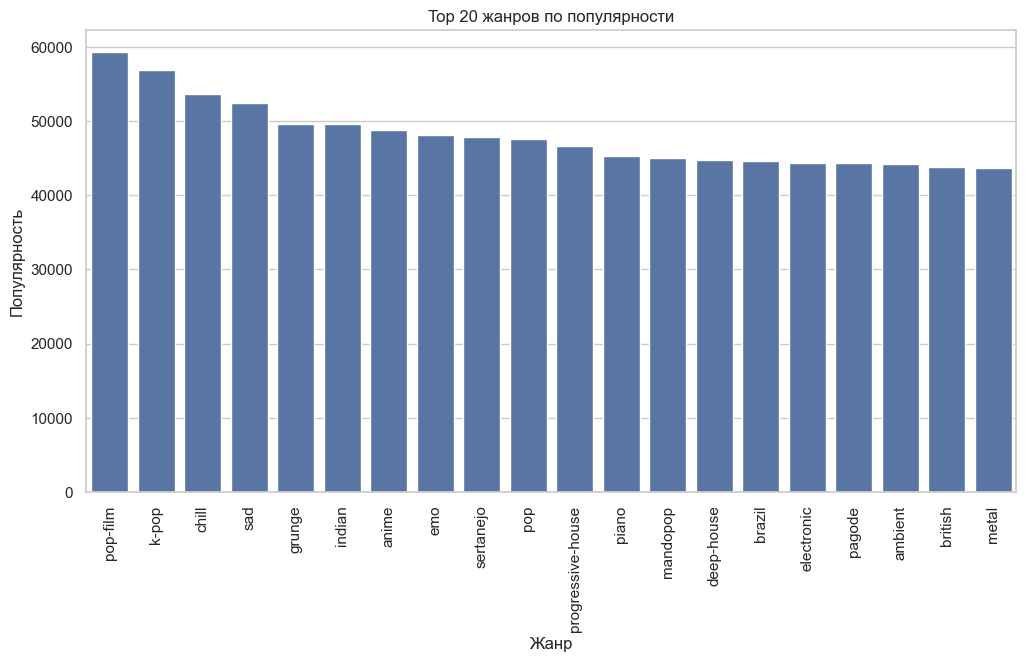

In [145]:
# Можно вывести топ-20 жанров по значению popularity
genre_pop = df.groupby('track_genre')['popularity'].sum().sort_values(ascending=False)
print(genre_pop.head(20))

plt.figure(figsize=(12,6))
sns.barplot(x=genre_pop.head(20).index, y=genre_pop.head(20).values)
plt.xticks(rotation=90)
plt.title('Top 20 жанров по популярности')
plt.ylabel('Популярность')
plt.xlabel('Жанр')
plt.show()

Видим, что поп-музыка популярнее остальных

artists
The Beatles              17021
Linkin Park              12560
BTS                      10358
Prateek Kuhad            10054
Elvis Presley             9307
Arctic Monkeys            8461
Charlie Brown Jr.         7136
Red Hot Chili Peppers     6540
CoComelon                 6023
Rammstein                 5825
Håkan Hellström           5762
my little airport         5680
OneRepublic               5586
Nirvana                   5546
Glee Cast                 5399
Anupam Roy                5149
Cigarettes After Sex      4972
Pink Floyd                4964
Adele                     4961
Jay Chou                  4856
Name: popularity, dtype: int64


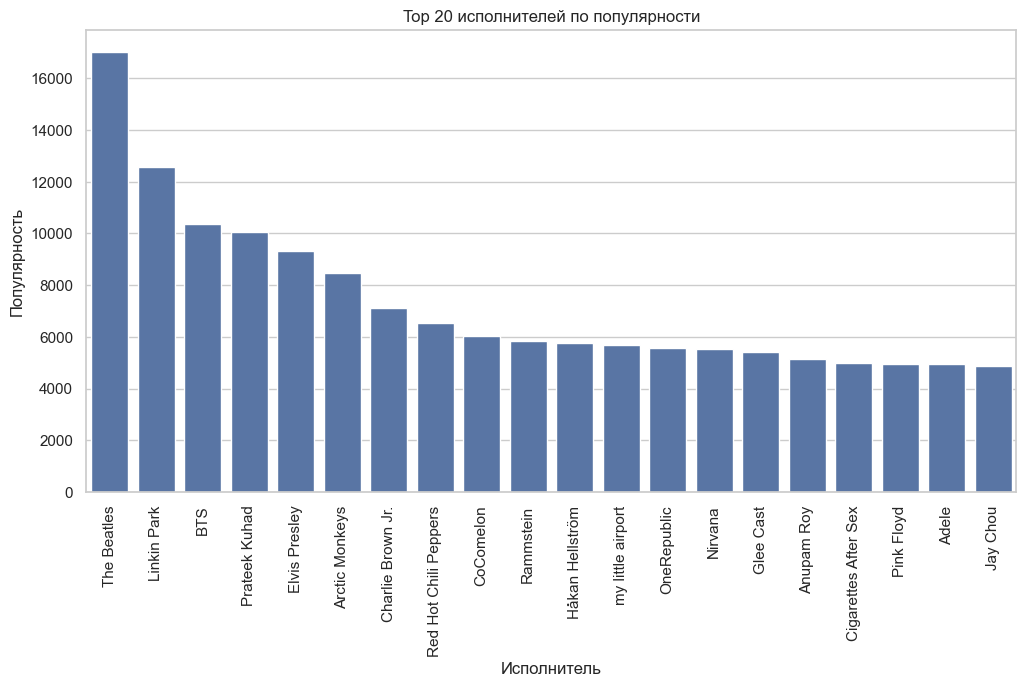

In [146]:
# Можно вывести топ-20 исполнителей по значению popularity
artists_pop = df.groupby('artists')['popularity'].sum().sort_values(ascending=False)
print(artists_pop.head(20))

plt.figure(figsize=(12,6))
sns.barplot(x=artists_pop.head(20).index, y=artists_pop.head(20).values)
plt.xticks(rotation=90)
plt.title('Top 20 исполнителей по популярности')
plt.ylabel('Популярность')
plt.xlabel('Исполнитель')
plt.show()

Сложно оценить зависимость, поскольку во многих случаях популярность зависит от количества треков, вдобавок есть совместные песни.

### Общие выводы:
Большинство категориальных признаков (mode, explicit, key, time_signature) оказывают слабое влияние на популярность — различия медиан минимальны.
Жанр (track_genre) — признак, где различия в популярности между категориями выражены явно. В Artists (исполнители) различия тоже выражены явно, но с этим столбцом сложно работать, поскольку есть совместные песни, а также много аномалий.

# 👨‍💻Feature Engineering

In [147]:
# Удаляем неинформативные признаки
df = df.drop(['Unnamed: 0', 'track_id', 'track_name', 'album_name', 'artists'], axis=1)

In [148]:
# duration в минуты для убобства
df['duration_min'] = df['duration_ms'] / 60000

In [149]:
# Категоризация длительности
duration_quantiles = df['duration_min'].quantile([0.25, 0.5, 0.75])
df['duration_category'] = pd.cut(df['duration_min'], 
                               bins=[0, duration_quantiles[0.25], duration_quantiles[0.5], 
                                    duration_quantiles[0.75], float('inf')],
                               labels=['very_short', 'short', 'medium', 'long'])

In [150]:
# Бинаризация
df['is_acoustic'] = (df['acousticness'] > 0.2).astype(int)
df['is_instrumental'] = (df['instrumentalness'] > 0.5).astype(int)
df['is_live'] = (df['liveness'] > 0.3).astype(int)

In [151]:
# Energy и valence имеют похожие распределения
df['energy_valence'] = df['energy'] * df['valence']
# Danceability и energy имеют похожие распределения
df['energy_danceability'] = df['energy'] * df['danceability']
# Speechiness и instrumentalness обратно пропорциональны
df['speech_instrumental_ratio'] = df['speechiness'] / (df['instrumentalness'] + 1)
# Loudness и energy сильно связаны
df['loudness_energy'] = df['loudness'] * df['energy']

In [152]:
def categorize_genre(genre):
    # Электронная музыка
    electronic = ['electronic', 'edm', 'house', 'techno', 'trance', 'dubstep', 'drum-and-bass', 
                 'electro', 'progressive-house', 'deep-house', 'ambient', 'downtempo']
    
    # Поп музыка
    pop = ['pop', 'pop-film', 'k-pop', 'j-pop', 'mandopop', 'cantopop', 'dance-pop']
    
    # Рок музыка
    rock = ['rock', 'metal', 'hard-rock', 'alternative', 'punk', 'grunge', 'indie', 
            'post-rock', 'progressive-rock', 'black-metal', 'death-metal', 'hardcore']
    
    # Хип-хоп и рэп
    hiphop = ['hip-hop', 'rap', 'trap', 'gangster-rap', 'r-n-b', 'urban']
    
    # Джаз и блюз
    jazz_blues = ['jazz', 'blues', 'soul', 'funk', 'gospel', 'swing']
    
    # Классическая и инструментальная
    classical = ['classical', 'orchestra', 'piano', 'instrumental', 'opera', 'symphony']
    
    # Латиноамериканская музыка
    latin = ['latin', 'salsa', 'reggaeton', 'samba', 'bossa-nova', 'brazil', 'sertanejo', 'pagode']
    
    # Мировая музыка
    world = ['world-music', 'african', 'indian', 'arabic', 'celtic', 'folk']
    
    # Регги и ска
    reggae = ['reggae', 'ska', 'dub']
    
    # Эмоциональные/настроенческие жанры
    mood = ['chill', 'sad', 'sleep', 'study', 'ambient', 'meditation']
    
    # Специфические жанры
    specific = ['children', 'anime', 'game', 'movie', 'soundtrack']
    
    # Кантри и фолк
    country = ['country', 'bluegrass', 'folk', 'americana']
    
    if any(genre in s for s in electronic):
        return 'electronic'
    elif any(genre in s for s in pop):
        return 'pop'
    elif any(genre in s for s in rock):
        return 'rock'
    elif any(genre in s for s in hiphop):
        return 'hiphop'
    elif any(genre in s for s in jazz_blues):
        return 'jazz_blues'
    elif any(genre in s for s in classical):
        return 'classical'
    elif any(genre in s for s in latin):
        return 'latin'
    elif any(genre in s for s in world):
        return 'world'
    elif any(genre in s for s in reggae):
        return 'reggae'
    elif any(genre in s for s in mood):
        return 'mood'
    elif any(genre in s for s in specific):
        return 'specific'
    elif any(genre in s for s in country):
        return 'country'
    else:
        return 'other'

# Применяем новую категоризацию
df['genre_category'] = df['track_genre'].apply(categorize_genre)

In [153]:
# Категориализация темпа
# На графике видно три пика: около 90, 120-130 и 170-180
df['tempo_bin'] = pd.cut(df['tempo'], 
                        bins=[0, 90, 130, 180, float('inf')],
                        labels=['slow', 'medium', 'fast', 'very_fast'])

In [154]:
# Создаем признак "экстремальности" значений
df['is_extreme_tempo'] = ((df['tempo'] < df['tempo'].quantile(0.1)) | 
                         (df['tempo'] > df['tempo'].quantile(0.9))).astype(int)

# Создаем признак "баланса" характеристик
df['features_balance'] = (abs(df['energy'] - df['danceability']) + 
                         abs(df['energy'] - df['valence']) + 
                         abs(df['danceability'] - df['valence'])) / 3

# Добавляем нелинейные преобразования для признаков с явно нелинейным распределением
df['speechiness_log'] = np.log1p(df['speechiness'])
df['instrumentalness_log'] = np.log1p(df['instrumentalness'])

In [155]:
# One-hot encoding категориальных признаков
cat_features = ['key', 'time_signature', 'genre_category', 'tempo_bin', 'duration_category']
df = pd.get_dummies(df, columns=cat_features, drop_first=True)

In [156]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Применяем к числовым признакам
for column in ['duration_min', 'loudness', 'tempo']:
    df = remove_outliers(df, column)

In [157]:
# Масштабирование числовых признаков
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Для нормально распределенных признаков
standard_features = ['energy', 'danceability', 'valence']
df[standard_features] = StandardScaler().fit_transform(df[standard_features])

# Для признаков с выбросами
robust_features = ['loudness', 'tempo', 'duration_min']
df[robust_features] = RobustScaler().fit_transform(df[robust_features])

# Для признаков, которые нужно привести к [0,1]
minmax_features = ['speechiness_log', 'instrumentalness_log']
df[minmax_features] = MinMaxScaler().fit_transform(df[minmax_features])

In [158]:
df

,popularity,duration_ms,explicit,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,...,genre_category_reggae,genre_category_rock,genre_category_specific,genre_category_world,tempo_bin_medium,tempo_bin_fast,tempo_bin_very_fast,duration_category_short,duration_category_medium,duration_category_long
0,73,230666,False,0.589476,-0.929097,-0.019231,0,0.1430,0.0322,0.000001,...,False,False,False,False,False,False,False,False,True,False
1,55,149610,False,-0.993865,-2.241729,-2.392308,1,0.0763,0.9240,0.000006,...,False,False,False,False,False,False,False,False,False,False
2,57,210826,False,-0.882536,-1.382956,-0.695249,1,0.0557,0.2100,0.000000,...,False,False,False,False,False,False,False,True,False,False
4,82,198853,False,0.230750,-1.009190,-0.683258,1,0.0526,0.4690,0.000000,...,False,False,False,False,True,False,False,True,False,False
5,58,214240,False,0.663695,-0.840105,-0.485520,1,0.1050,0.2890,0.000000,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113994,22,305454,False,-1.544323,-2.219481,-2.037783,1,0.0350,0.9200,0.022900,...,False,False,False,True,False,True,False,False,False,True
113995,21,384999,False,-2.527726,-1.934706,-2.201810,1,0.0422,0.6400,0.928000,...,False,False,False,True,True,False,False,False,False,True
113997,22,271466,False,0.298784,-1.516444,-0.957919,0,0.0420,0.8670,0.000000,...,False,False,False,True,False,True,False,False,False,True
113998,41,283893,False,0.039017,-0.728865,-0.956561,1,0.0297,0.3810,0.000000,...,False,False,False,True,False,True,False,False,False,True


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102307 entries, 0 to 113999
Data columns (total 59 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   popularity                 102307 non-null  int64  
 1   duration_ms                102307 non-null  int64  
 2   explicit                   102307 non-null  bool   
 3   danceability               102307 non-null  float64
 4   energy                     102307 non-null  float64
 5   loudness                   102307 non-null  float64
 6   mode                       102307 non-null  int64  
 7   speechiness                102307 non-null  float64
 8   acousticness               102307 non-null  float64
 9   instrumentalness           102307 non-null  float64
 10  liveness                   102307 non-null  float64
 11  valence                    102307 non-null  float64
 12  tempo                      102307 non-null  float64
 13  track_genre                102307 


Корреляции новых признаков с popularity:
popularity                   1.000000
genre_category_pop           0.120903
genre_category_electronic    0.085221
genre_category_world         0.072121
genre_category_mood          0.067677
genre_category_specific      0.049364
duration_category_medium     0.046925
loudness_energy              0.036676
is_acoustic                  0.031862
genre_category_hiphop        0.020690
tempo_bin_fast               0.020218
genre_category_rock          0.014756
duration_category_long       0.010563
duration_category_short      0.007010
genre_category_reggae        0.005825
features_balance            -0.008144
tempo_bin_medium            -0.009268
energy_danceability         -0.013018
tempo_bin_very_fast         -0.014711
is_live                     -0.014975
is_extreme_tempo            -0.017561
genre_category_latin        -0.025075
speech_instrumental_ratio   -0.035136
speechiness_log             -0.046589
energy_valence              -0.050153
genre_ca

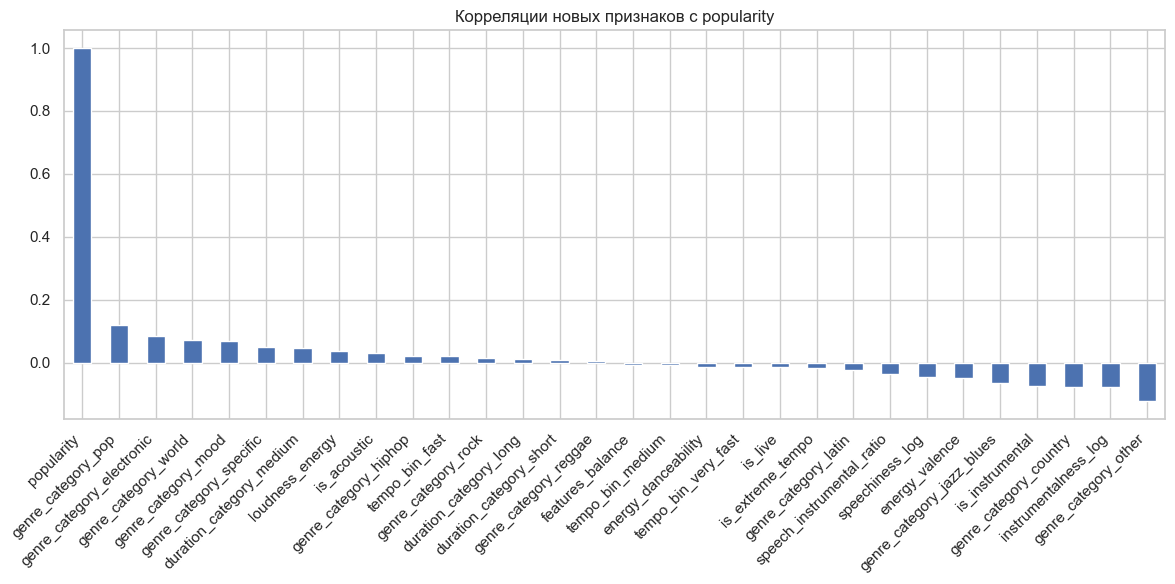

In [160]:
# Список новых/преобразованных признаков
new_features = [
    'is_acoustic',
    'is_instrumental',
    'is_live',
    'energy_valence',
    'energy_danceability',
    'speech_instrumental_ratio',
    'loudness_energy',
    'is_extreme_tempo',
    'features_balance',
    'speechiness_log',
    'instrumentalness_log'
]

# Добавляем категориальные признаки после one-hot encoding
categorical_dummies = [col for col in df.columns if any(x in col for x in ['duration_category_', 'tempo_bin_', 'genre_category_'])]
new_features.extend(categorical_dummies)

# Вычисляем корреляции только для новых признаков
correlations = df[new_features + ['popularity']].corr()['popularity'].sort_values(ascending=False)

print("\nКорреляции новых признаков с popularity:")
print(correlations)

# Визуализация
plt.figure(figsize=(12, 6))
correlations.plot(kind='bar')
plt.title('Корреляции новых признаков с popularity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Корреляции с популярностью треков по прежнему слабые, но заметна корреляция с некоторыми жанрами (например корреляция с категорией поп).

# 👩‍🎓 Эксперименты с моделями

In [161]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

# One-hot encoding для категориальных признаков
df_encoded = pd.get_dummies(df, drop_first=True)
# Определение признаков и целевой переменной
X = df_encoded.drop('popularity', axis=1)
y = df_encoded['popularity']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Словарь для хранения моделей
regression_models = {
    'Линейная регрессия': LinearRegression(),
    'Градиентный бустинг': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'Случайный лес': RandomForestRegressor(random_state=42),
    'MLP': MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
}

# Оценка моделей на test-выборке
test_results = {}
for name, model in regression_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    test_results[model] = {
        'MSE': mse,
        'RMSE': rmse,
        'R-squared': r2
    }
    print(f"{name} на test: MSE = {mse:.4f}, RMSE = {rmse:.4f}, R2_score = {r2:.4f}")



Линейная регрессия на test: MSE = 379.6466, RMSE = 19.4845, R2_score = 0.2522
Градиентный бустинг на test: MSE = 409.0706, RMSE = 20.2255, R2_score = 0.1942
XGBoost на test: MSE = 335.3069, RMSE = 18.3114, R2_score = 0.3395
KNN на test: MSE = 443.3376, RMSE = 21.0556, R2_score = 0.1267
Случайный лес на test: MSE = 273.3047, RMSE = 16.5319, R2_score = 0.4616
MLP на test: MSE = 1127.0298, RMSE = 33.5713, R2_score = -1.2201


#### Лучшие результаты получили у Случайного леса (RandomForestRegressor), а именно MSE = 273.3047 , RMSE = 16.5319 , R2_Score = 0.4616. Далее будем оценивать по RMSE.

#### Теперь выполним кросс-валидацию из 5 фолдов для получения окончательного результата.

In [123]:
rf_model = RandomForestRegressor(random_state=42)

# Кросс-валидация (5 фолдов)
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf_model, X, y, cv=cv, scoring='neg_mean_squared_error')

# Среднее и стандартное отклонение RMSE
rmse_scores = np.sqrt(-cv_scores)
print(f"Random Forest: Среднее RMSE = {rmse_scores.mean():.4f} ± {rmse_scores.std():.4f}")

Random Forest: Среднее RMSE = 16.4202 ± 0.1344


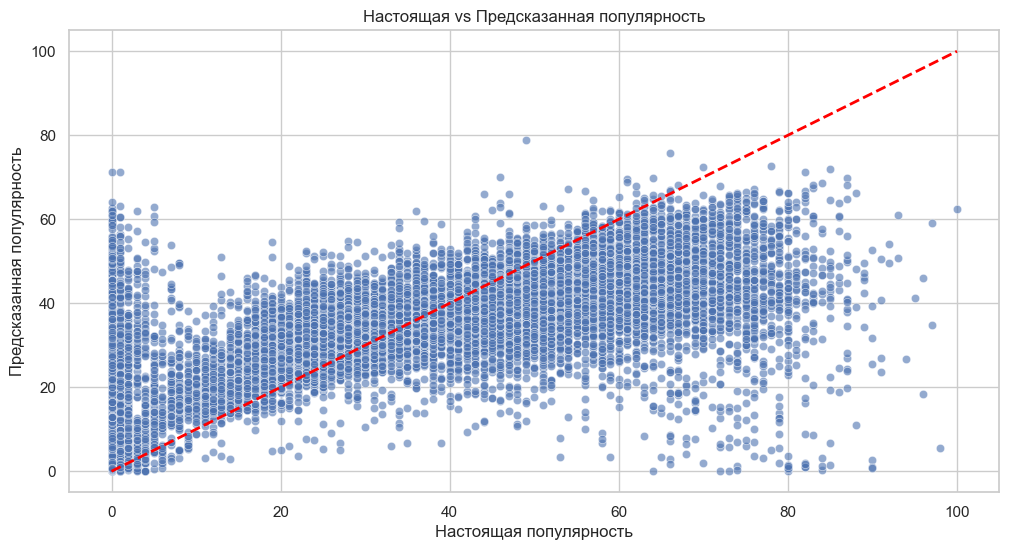

In [125]:
# Визуализация: настоящее vs предсказанное
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, linestyle='--')
plt.xlabel('Настоящая популярность')
plt.ylabel('Предсказанная популярность')
plt.title('Настоящая vs Предсказанная популярность')
plt.show()

#### Наглядно видно, что модель не идеальна - в области маленьких значений наибольшие проблемы, но в целом модель справляется.

# Вывод: удалось создать модель на основе RandomForestRegressor (Случайный лес), которая выполняет предсказания популярности (Popularity) с приемлимой точностью (RMSE = 16.4202 ± 0.1344). Для этого понадобилось проанализировать данные датасета и выполнить дополнительные преобразования (обработка выбросов, создание новых столбцов) с целью увеличения точности предсказания конечной модели. Для увеличения точности конечной модели можно было дальше анализировать и преобразовывать данные (например, поработать с artists), попробовать подобрать гиперпараметры для всех рассматриваемых моделей. 